🔹 Revenue by Discount Range:
 discount_range
21-30%    2.730019e+11
61%+      2.129949e+11
31-40%    1.369883e+11
41-50%    1.291874e+11
11-20%    7.376819e+10
51-60%    5.971192e+10
0-10%     1.952602e+10
Name: revenue, dtype: float64


C:\Users\AKASH KRITHIK\AppData\Local\Temp\ipykernel_27404\1507643596.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_revenue = df.groupby('discount_range')['revenue'].sum().sort_values(ascending=False)


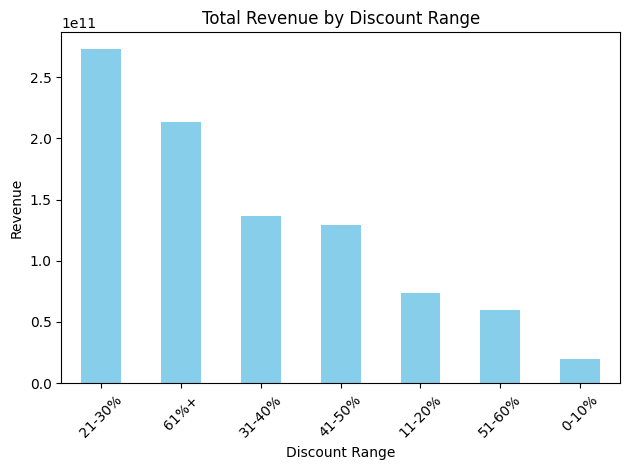


🔹 Correlation between Discount % and Rating Count:
                      discount_percentage  rating_count
discount_percentage             1.000000      0.011851
rating_count                    0.011851      1.000000


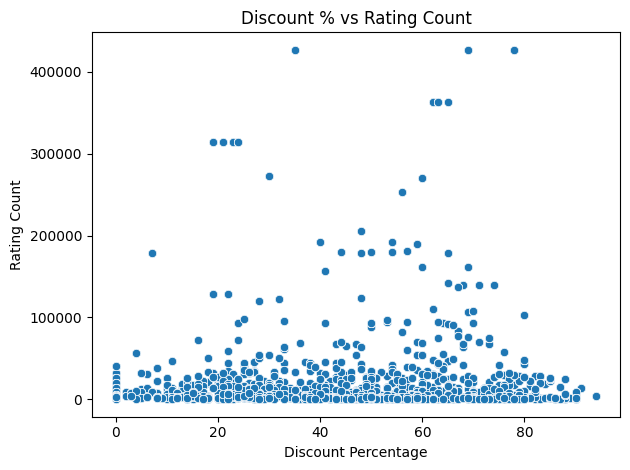


🔹 Average Rating by Discount Range:
 discount_range
0-10%     4.158889
21-30%    4.152181
11-20%    4.140160
31-40%    4.102195
41-50%    4.100502
51-60%    4.065193
61%+      4.064017
Name: rating, dtype: float64


C:\Users\AKASH KRITHIK\AppData\Local\Temp\ipykernel_27404\1507643596.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_discount = df.groupby('discount_range')['rating'].mean().sort_values(ascending=False)


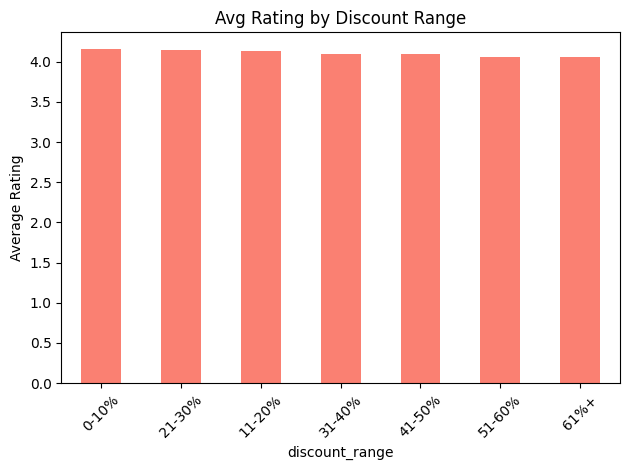

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming you've already loaded it as `df`)
file_path = r"C:\Users\AKASH KRITHIK\Desktop\Amazon Sales Data Analysis\cleaned_amazon_data.csv"
df = pd.read_csv(file_path)
# print(df['discount_percentage'].head())
# df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Drop rows with NaN discount values
df = df.dropna(subset=['discount_percentage'])

# Define discount bins
bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61%+']
df['discount_range'] = pd.cut(df['discount_percentage'], bins=bins, labels=labels)

# Q1: Discount range vs total revenue
discount_revenue = df.groupby('discount_range')['revenue'].sum().sort_values(ascending=False)
print("🔹 Revenue by Discount Range:\n", discount_revenue)

# Plot
discount_revenue.plot(kind='bar', title='Total Revenue by Discount Range', ylabel='Revenue', xlabel='Discount Range', color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q2: Correlation between discount % and rating count
correlation = df[['discount_percentage', 'rating_count']].corr()
print("\n🔹 Correlation between Discount % and Rating Count:\n", correlation)

# Plot
sns.scatterplot(data=df, x='discount_percentage', y='rating_count')
plt.title('Discount % vs Rating Count')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating Count')
plt.tight_layout()
plt.show()

# Q3: Average rating across discount levels
avg_rating_discount = df.groupby('discount_range')['rating'].mean().sort_values(ascending=False)
print("\n🔹 Average Rating by Discount Range:\n", avg_rating_discount)

# Plot
avg_rating_discount.plot(kind='bar', title='Avg Rating by Discount Range', color='salmon')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

